<a href="https://colab.research.google.com/github/karolinakuligowska/TMSMM_codes/blob/main/Class_12_Neural_Nets_RNN__R_example2_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Enhance NN model for classifying sentiment of movie_review.csv
# by incorporating two hidden layers
# Let's see if the model captures more complex patterns and improves performance

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, GlobalAveragePooling1D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load dataset ----
df = pd.read_csv('movie_review.csv', encoding='utf-8')

In [3]:
# Split the dataset into training and testing
training, testing = train_test_split(df, test_size=0.2, random_state=123)

In [4]:
# Prepare the data
num_words = 10000
max_length = 50


# Create the TextVectorization layer
text_vectorization = TextVectorization(
    max_tokens=num_words,
    output_sequence_length=max_length
)

In [5]:
# Adapt the TextVectorization layer to the training data
text_vectorization.adapt(training['text'])

In [7]:
# Build the model
input_layer = Input(shape=(1,), dtype="string")

x = text_vectorization(input_layer)
x = Embedding(input_dim=num_words + 1, output_dim=16)(x)
x = GlobalAveragePooling1D()(x)
x = Dense(64, activation="relu")(x)  # First hidden layer with 64 units
x = Dropout(0.5)(x)
x = Dense(32, activation="relu")(x)  # Second hidden layer with 32 units
x = Dropout(0.5)(x)

output_layer = Dense(1, activation="sigmoid")(x)

model = Model(input_layer, output_layer)

In [12]:
# Adding multiple hidden layers enables the model to learn hierarchical representations of the text data,
# which is beneficial for capturing the nuances in text reviews.
# The combination of different layer sizes allows the network to first learn broad patterns and then focus on more specific features.
# Dropout layers help in regularizing the model, reducing the risk of overfitting.

In [13]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [14]:
# Train the model
history = model.fit(
    x=training['text'],
    y=(training['tag'] == "pos").astype(int),
    epochs=20,
    batch_size=512,
    validation_split=0.2,
    verbose=2
)


Epoch 1/20
81/81 - 5s - 64ms/step - accuracy: 0.7813 - loss: 0.4912 - val_accuracy: 0.6715 - val_loss: 0.7083
Epoch 2/20
81/81 - 1s - 18ms/step - accuracy: 0.8142 - loss: 0.4260 - val_accuracy: 0.6735 - val_loss: 0.7110
Epoch 3/20
81/81 - 1s - 15ms/step - accuracy: 0.8123 - loss: 0.4240 - val_accuracy: 0.6695 - val_loss: 0.7150
Epoch 4/20
81/81 - 1s - 16ms/step - accuracy: 0.8155 - loss: 0.4194 - val_accuracy: 0.6682 - val_loss: 0.7436
Epoch 5/20
81/81 - 1s - 16ms/step - accuracy: 0.8171 - loss: 0.4130 - val_accuracy: 0.6627 - val_loss: 0.7018
Epoch 6/20
81/81 - 1s - 13ms/step - accuracy: 0.8168 - loss: 0.4096 - val_accuracy: 0.6678 - val_loss: 0.7638
Epoch 7/20
81/81 - 1s - 13ms/step - accuracy: 0.8219 - loss: 0.4006 - val_accuracy: 0.6627 - val_loss: 0.7392
Epoch 8/20
81/81 - 1s - 13ms/step - accuracy: 0.8183 - loss: 0.3993 - val_accuracy: 0.6704 - val_loss: 0.7950
Epoch 9/20
81/81 - 1s - 13ms/step - accuracy: 0.8154 - loss: 0.3991 - val_accuracy: 0.6669 - val_loss: 0.7889
Epoch 10/2

In [15]:
# Evaluate the model
results = model.evaluate(
    x=testing['text'],
    y=(testing['tag'] == "pos").astype(int),
    verbose=0
)

print(f"Test Loss: {results[0]:.2f}")
print(f"Test Accuracy: {results[1]:.2f}")


Test Loss: 0.94
Test Accuracy: 0.66


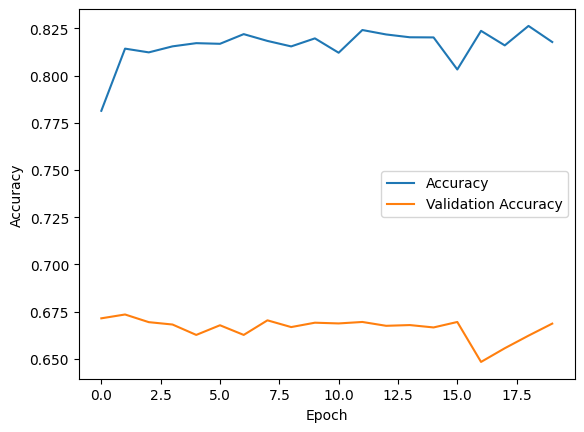

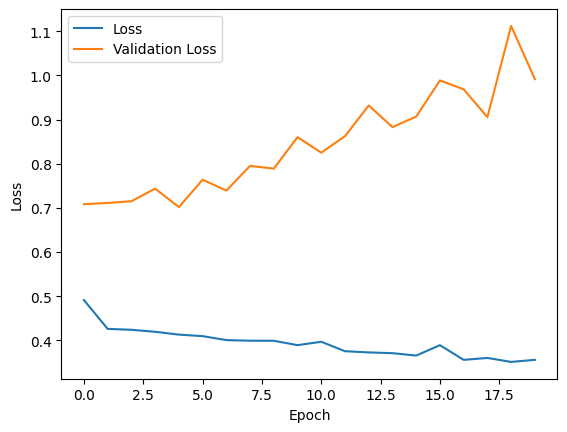

In [16]:
# Plot accuracy and loss over time (epochs)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
# Further considerations toward improvements:

# Hyperparameter Tuning
# => eperiment with different numbers of units, dropout rates, and activation functions
# to find the optimal configuration for this specific dataset.

# Advanced Architectures
# explore RNNs or CNNs if they can capture features more effectively.

In [ ]:
# RNN ----

In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, SimpleRNN, Dense, Dropout, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split


In [27]:
# Load dataset
df = pd.read_csv('movie_review.csv', encoding='utf-8')

# Display the first few rows
print(df.head())

# Check the distribution of labels
print(df['tag'].value_counts())

# Example of a review
print(df['text'][0])

   fold_id cv_tag  html_id  sent_id  \
0        0  cv000    29590        0   
1        0  cv000    29590        1   
2        0  cv000    29590        2   
3        0  cv000    29590        3   
4        0  cv000    29590        4   

                                                text  tag  
0  films adapted from comic books have had plenty...  pos  
1  for starters , it was created by alan moore ( ...  pos  
2  to say moore and campbell thoroughly researche...  pos  
3  the book ( or " graphic novel , " if you will ...  pos  
4  in other words , don't dismiss this film becau...  pos  
tag
pos    32937
neg    31783
Name: count, dtype: int64
films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before .


In [28]:
# Split the dataset into training and testing sets
training, testing = train_test_split(df, test_size=0.2, random_state=123)

# Define parameters
num_words = 10000  # Vocabulary size
max_length = 100   # Maximum number of words per review

# Create the TextVectorization layer
text_vectorization = TextVectorization(
    max_tokens=num_words,
    output_sequence_length=max_length
)

# Adapt the TextVectorization layer to the training data
text_vectorization.adapt(training['text'])

In [29]:
# Build the 2 layers RNN Model:

input_layer = Input(shape=(1,), dtype="string")

x = text_vectorization(input_layer)
x = Embedding(input_dim=num_words + 1, output_dim=64)(x)
x = SimpleRNN(64, return_sequences=True)(x)  # Return full sequence
x = Dropout(0.5)(x)
x = SimpleRNN(32, return_sequences=False)(x)  # Process the sequence from the previous RNN layer
x = Dropout(0.5)(x)

output_layer = Dense(1, activation="sigmoid")(x)

model = Model(input_layer, output_layer)


In [30]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [31]:
history = model.fit(
    x=training['text'],
    y=(training['tag'] == "pos").astype(int),
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=2
)

Epoch 1/10
648/648 - 67s - 104ms/step - accuracy: 0.5000 - loss: 0.7006 - val_accuracy: 0.5061 - val_loss: 0.6932
Epoch 2/10
648/648 - 76s - 117ms/step - accuracy: 0.5044 - loss: 0.6943 - val_accuracy: 0.5009 - val_loss: 0.6940
Epoch 3/10
648/648 - 78s - 121ms/step - accuracy: 0.5020 - loss: 0.6941 - val_accuracy: 0.5102 - val_loss: 0.6929
Epoch 4/10
648/648 - 81s - 125ms/step - accuracy: 0.5070 - loss: 0.6934 - val_accuracy: 0.5064 - val_loss: 0.6931
Epoch 5/10
648/648 - 49s - 76ms/step - accuracy: 0.5061 - loss: 0.6933 - val_accuracy: 0.5105 - val_loss: 0.6930
Epoch 6/10
648/648 - 83s - 128ms/step - accuracy: 0.5029 - loss: 0.6932 - val_accuracy: 0.5090 - val_loss: 0.6930
Epoch 7/10
648/648 - 83s - 128ms/step - accuracy: 0.5030 - loss: 0.6951 - val_accuracy: 0.5044 - val_loss: 0.6933
Epoch 8/10
648/648 - 82s - 127ms/step - accuracy: 0.5031 - loss: 0.6938 - val_accuracy: 0.5057 - val_loss: 0.6932
Epoch 9/10
648/648 - 80s - 124ms/step - accuracy: 0.5084 - loss: 0.6932 - val_accuracy: 0

In [32]:
results = model.evaluate(
    x=testing['text'],
    y=(testing['tag'] == "pos").astype(int),
    verbose=0
)

print(f"Test Loss: {results[0]:.2f}")
print(f"Test Accuracy: {results[1]:.2f}")

Test Loss: 0.69
Test Accuracy: 0.53


In [33]:
# 2x RNN hidden layers deteriorated the model accuracy!

In [ ]:
# LSTM ----

In [34]:
# To enhance the model let's implement RNN LSTM with two hidden layers

from tensorflow.keras.layers import LSTM

input_layer = Input(shape=(1,), dtype="string")

x = text_vectorization(input_layer)
x = Embedding(input_dim=num_words + 1, output_dim=64)(x)
x = LSTM(64, return_sequences=True)(x)  # First LSTM layer
x = Dropout(0.5)(x)
x = LSTM(32)(x)  # Second LSTM layer
x = Dropout(0.5)(x)

output_layer = Dense(1, activation="sigmoid")(x)

model = Model(input_layer, output_layer)


In [35]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [36]:
history = model.fit(
    x=training['text'],
    y=(training['tag'] == "pos").astype(int),
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=2
)

Epoch 1/10
648/648 - 105s - 162ms/step - accuracy: 0.5036 - loss: 0.6936 - val_accuracy: 0.5103 - val_loss: 0.6929
Epoch 2/10
648/648 - 144s - 222ms/step - accuracy: 0.5079 - loss: 0.6932 - val_accuracy: 0.5103 - val_loss: 0.6930
Epoch 3/10
648/648 - 138s - 213ms/step - accuracy: 0.5050 - loss: 0.6933 - val_accuracy: 0.5103 - val_loss: 0.6931
Epoch 4/10
648/648 - 141s - 217ms/step - accuracy: 0.5049 - loss: 0.6932 - val_accuracy: 0.5103 - val_loss: 0.6929
Epoch 5/10
648/648 - 98s - 152ms/step - accuracy: 0.5074 - loss: 0.6932 - val_accuracy: 0.5103 - val_loss: 0.6929
Epoch 6/10
648/648 - 142s - 219ms/step - accuracy: 0.5038 - loss: 0.6932 - val_accuracy: 0.5103 - val_loss: 0.6930
Epoch 7/10
648/648 - 98s - 152ms/step - accuracy: 0.5060 - loss: 0.6931 - val_accuracy: 0.5103 - val_loss: 0.6930
Epoch 8/10
648/648 - 141s - 218ms/step - accuracy: 0.5080 - loss: 0.6932 - val_accuracy: 0.5103 - val_loss: 0.6929
Epoch 9/10
648/648 - 99s - 152ms/step - accuracy: 0.5082 - loss: 0.6931 - val_accu

In [37]:
results = model.evaluate(
    x=testing['text'],
    y=(testing['tag'] == "pos").astype(int),
    verbose=0
)

print(f"Test Loss: {results[0]:.2f}")
print(f"Test Accuracy: {results[1]:.2f}")

Test Loss: 0.69
Test Accuracy: 0.51


In [38]:
# 2x LSTM hidden layers deteriorated the model accuracy!

In [ ]:
# CNN ----

In [39]:
# To enhance the model let's implement CNN with two hidden layers.
# CNN can capture local patterns in text data.

from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D


input_layer = Input(shape=(1,), dtype="string")

x = text_vectorization(input_layer)
x = Embedding(input_dim=num_words + 1, output_dim=64)(x)
x = Conv1D(filters=128, kernel_size=5, activation='relu', padding="same")(x) # First CNN hidden layer, Conv1D applies 128 filters with a kernel size of 5 to capture local dependencies in the text
x = Conv1D(filters=64, kernel_size=3, activation='relu', padding="same")(x) # Second CNN hidden layer with 64 filters and a kernel size of 3
x = GlobalMaxPooling1D()(x) # Pooling layer to reduce dimensionality by taking the maximum value over time steps, highlighting the most significant features.
x = Dropout(0.5)(x) # Dropout for regularization

output_layer = Dense(1, activation="sigmoid")(x)

model = Model(input_layer, output_layer)


In [40]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [41]:
history = model.fit(
    x=training['text'],
    y=(training['tag'] == "pos").astype(int),
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=2
)

Epoch 1/10
648/648 - 57s - 89ms/step - accuracy: 0.5947 - loss: 0.6607 - val_accuracy: 0.6619 - val_loss: 0.6106
Epoch 2/10
648/648 - 54s - 84ms/step - accuracy: 0.7153 - loss: 0.5545 - val_accuracy: 0.6804 - val_loss: 0.5954
Epoch 3/10
648/648 - 54s - 83ms/step - accuracy: 0.7842 - loss: 0.4539 - val_accuracy: 0.6825 - val_loss: 0.6379
Epoch 4/10
648/648 - 81s - 124ms/step - accuracy: 0.8384 - loss: 0.3492 - val_accuracy: 0.6708 - val_loss: 0.7448
Epoch 5/10
648/648 - 83s - 128ms/step - accuracy: 0.8863 - loss: 0.2520 - val_accuracy: 0.6667 - val_loss: 0.9490
Epoch 6/10
648/648 - 84s - 129ms/step - accuracy: 0.9223 - loss: 0.1771 - val_accuracy: 0.6580 - val_loss: 1.2155
Epoch 7/10
648/648 - 81s - 124ms/step - accuracy: 0.9429 - loss: 0.1301 - val_accuracy: 0.6561 - val_loss: 1.5411
Epoch 8/10
648/648 - 81s - 125ms/step - accuracy: 0.9583 - loss: 0.0982 - val_accuracy: 0.6544 - val_loss: 1.8643
Epoch 9/10
648/648 - 51s - 78ms/step - accuracy: 0.9668 - loss: 0.0810 - val_accuracy: 0.64

In [42]:
results = model.evaluate(
    x=testing['text'],
    y=(testing['tag'] == "pos").astype(int),
    verbose=0
)

print(f"Test Loss: {results[0]:.2f}")
print(f"Test Accuracy: {results[1]:.2f}")

Test Loss: 2.31
Test Accuracy: 0.65


In [ ]:
# 2x CNN hidden layers improved the model accuracy!
# Is this accuracy higher than simple 1 layer NN?

In [ ]:
# Lightweight Transformer ----

In [ ]:
# last chance :)

In [43]:
import tensorflow as tf
from tensorflow.keras.layers import Input, TextVectorization, Embedding, MultiHeadAttention, Dense, Dropout, LayerNormalization, GlobalAveragePooling1D
from tensorflow.keras.models import Model


input_layer = Input(shape=(1,), dtype="string")

x = text_vectorization(input_layer)
x = Embedding(input_dim=num_words + 1, output_dim=64)(x)

# Simple Transformer Encoder Block
attention = MultiHeadAttention(num_heads=2, key_dim=64)(x, x)  # Lightweight Self-Attention with 2 heads to capture word dependencies
x = LayerNormalization()(x + attention)  # Normalization layer

x = GlobalAveragePooling1D()(x) # Pooling layer to reduce dimensionality
x = Dropout(0.5)(x) # Dropout for regularization

output_layer = Dense(1, activation="sigmoid")(x)

model = Model(input_layer, output_layer)



In [44]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [45]:
history = model.fit(
    x=training['text'],
    y=(training['tag'] == "pos").astype(int),
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=2
)

Epoch 1/10
648/648 - 95s - 147ms/step - accuracy: 0.5772 - loss: 0.6747 - val_accuracy: 0.6749 - val_loss: 0.6042
Epoch 2/10
648/648 - 128s - 197ms/step - accuracy: 0.7164 - loss: 0.5552 - val_accuracy: 0.6855 - val_loss: 0.5966
Epoch 3/10
648/648 - 81s - 125ms/step - accuracy: 0.7561 - loss: 0.4953 - val_accuracy: 0.6851 - val_loss: 0.6186
Epoch 4/10
648/648 - 85s - 132ms/step - accuracy: 0.7733 - loss: 0.4673 - val_accuracy: 0.6810 - val_loss: 0.6224
Epoch 5/10
648/648 - 79s - 121ms/step - accuracy: 0.7872 - loss: 0.4428 - val_accuracy: 0.6719 - val_loss: 0.6567
Epoch 6/10
648/648 - 84s - 129ms/step - accuracy: 0.7974 - loss: 0.4155 - val_accuracy: 0.6713 - val_loss: 0.7113
Epoch 7/10
648/648 - 80s - 123ms/step - accuracy: 0.8056 - loss: 0.3890 - val_accuracy: 0.6672 - val_loss: 0.8262
Epoch 8/10
648/648 - 76s - 117ms/step - accuracy: 0.8139 - loss: 0.3648 - val_accuracy: 0.6705 - val_loss: 0.8184
Epoch 9/10
648/648 - 86s - 133ms/step - accuracy: 0.8213 - loss: 0.3453 - val_accuracy:

In [46]:
results = model.evaluate(
    x=testing['text'],
    y=(testing['tag'] == "pos").astype(int),
    verbose=0
)

print(f"Test Loss: {results[0]:.2f}")
print(f"Test Accuracy: {results[1]:.2f}")

Test Loss: 0.96
Test Accuracy: 0.66


In [47]:
# Summary of the model
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_vectorization_2      │ (None, 100)            │              0 │ input_layer_5[0][0]    │
│ (TextVectorization)       │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, 100, 64)        │        640,064 │ text_vectorization_2[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 100, 64)        │         33,216 │ embedding_5[0][0],     │
│ (MultiHeadAttention)      │                        │                │ embedding_5[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 100, 64)        │              0 │ embedding_5[0][0],     │
│                           │                        │                │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 100, 64)        │            128 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 64)             │              0 │ layer_normalization[0… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 64)             │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │             65 │ dropout_9[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,020,421 (7.71 MB)

 Trainable params: 673,473 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,346,948 (5.14 MB)